Before SMOTE: class
0    95872
1     9906
Name: count, dtype: int64
After SMOTE: class
0    95872
1    95872
Name: count, dtype: int64

== Logistic Regression Evaluation ==
F1 Score: 0.6074103665235194
Confusion Matrix:
 [[38362  2727]
 [ 1204  3041]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     41089
           1       0.53      0.72      0.61      4245

    accuracy                           0.91     45334
   macro avg       0.75      0.83      0.78     45334
weighted avg       0.93      0.91      0.92     45334

AUC-PR: 0.6735034825405366


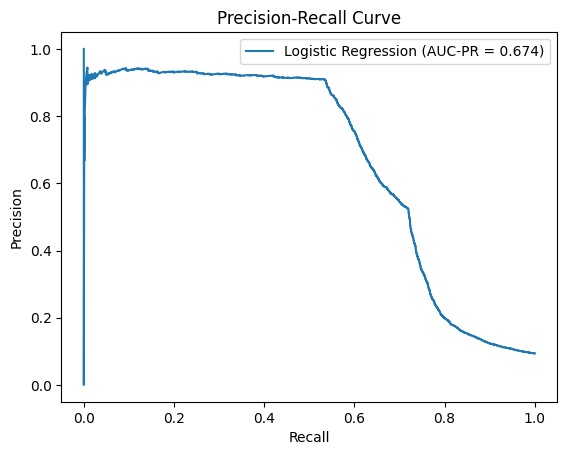


== XGBoost Evaluation ==
F1 Score: 0.6937058735165991
Confusion Matrix:
 [[40986   103]
 [ 1936  2309]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       0.96      0.54      0.69      4245

    accuracy                           0.96     45334
   macro avg       0.96      0.77      0.83     45334
weighted avg       0.96      0.96      0.95     45334

AUC-PR: 0.7148961477796879


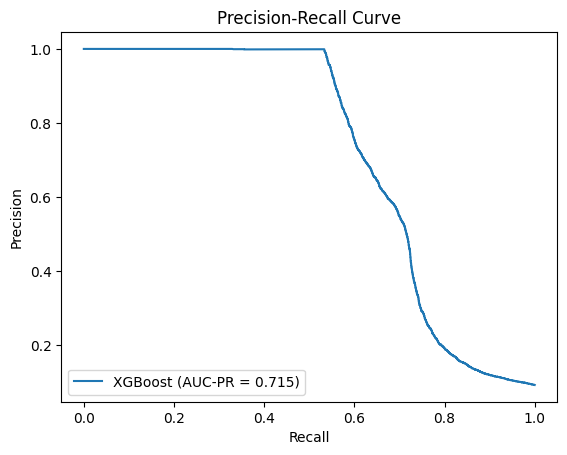

Before SMOTE: Class
0    198277
1       331
Name: count, dtype: int64
After SMOTE: Class
0    198277
1    198277
Name: count, dtype: int64

== Logistic Regression Evaluation ==
F1 Score: 0.09321401938851603
Confusion Matrix:
 [[82561  2415]
 [   17   125]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

AUC-PR: 0.7256439260636424


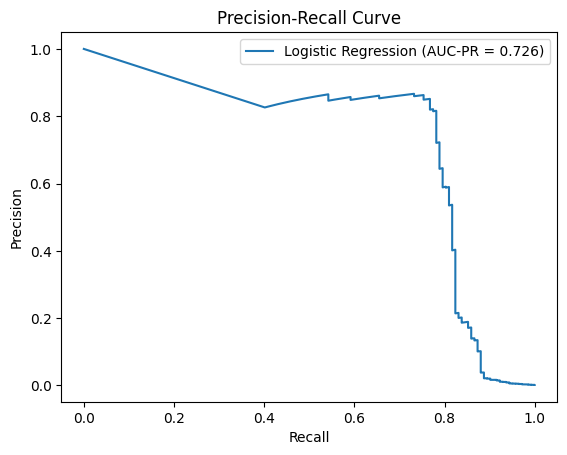


== XGBoost Evaluation ==
F1 Score: 0.7746478873239436
Confusion Matrix:
 [[84944    32]
 [   32   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.77      0.77      0.77       142

    accuracy                           1.00     85118
   macro avg       0.89      0.89      0.89     85118
weighted avg       1.00      1.00      1.00     85118

AUC-PR: 0.7828344890312415


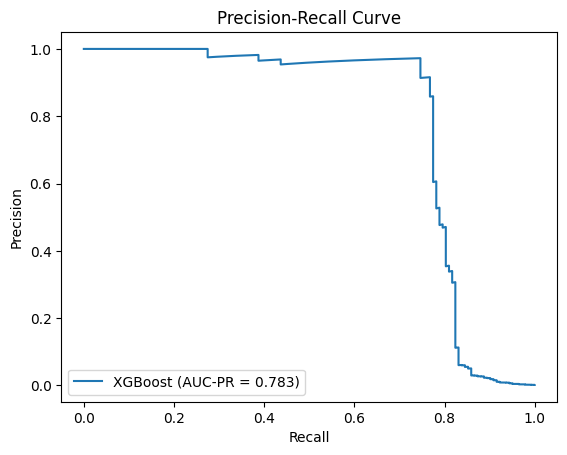

In [5]:
import pandas as pd
import os
import sys
import importlib
sys.path.append(os.path.abspath(".."))
import src.preprocessing
importlib.reload(src.preprocessing)

import src.models
importlib.reload(src.models)
import src.features
importlib.reload(src.features)

from src.preprocessing import Preprocessor
from src.features import FeatureEngineer
from src.models import ModelTrainer

# Load everything
pp = Preprocessor(
    fraud_path='../data/Fraud_Data.csv',
    ip_path='../data/IpAddress_to_Country.csv',
    credit_path='../data/creditcard.csv'
)
fraud_df, ip_df, credit_df = pp.load_data()
pp.convert_datetime_columns()
pp.convert_ip_to_int()
pp.drop_creditcard_duplicates()
fraud_df = pp.fraud_df
credit_df = pp.credit_df

# Feature engineering on fraud_df

fe = FeatureEngineer(fraud_df)
fraud_df = fe.add_time_features()
fraud_df = fe.add_transaction_frequency()
fraud_df = fe.add_country_from_ip(ip_df)



# Drop non-numeric or identifier columns
drop_cols = ['signup_time', 'purchase_time', 'ip_address', 'ip_int', 'user_id', 'device_id', 'country']
mt = ModelTrainer(fraud_df, target_col='class', drop_cols=drop_cols)
mt.preprocess()
mt.train_logistic_regression()
mt.train_xgboost()

mt2 = ModelTrainer(credit_df, target_col='Class', drop_cols=['Time'])
mt2.preprocess()
mt2.train_logistic_regression()
mt2.train_xgboost()


